**MACHINE LEARNING PARA REGRESSÃO**

Este notebook apresenta um exercício prático de **Machine Learning para Regressão de Dados** utilizando as bibliotecas: **Pandas**, **Scikit-Learn** e **Matplotlib** do Python.

Será utilizado um conjunto de dados formatado como texto delimitado (CSV) contendo dados ambientais. O objetivo é realizar a previsão da energia solar disponível na superfície terrestre usando dados climáticos como variáveis preditoras. Serão consideradas as seguintes técnicas de treinamento de modelos de Machine Learning:

- Ingestão de dados.
- Separação dos dados.
- Treinamento do modelo de Machine Learning.
- Avaliação estatística dos resultado.
- Avaliação gráfica dos resultados.

1 - Instalação das Bibliotecas

In [ ]:
# Instalação do Pandas para manipulação de dados.
!pip install pandas

# Instalação do Scikit-Learn para modelagem de machine learning.
!pip install scikit-learn

# Instalação do Matplotlib para criação de gráficos.
!pip install matplotlib

2 - Importação das Bibliotecas

In [ ]:
# Usada para manipulação de dados.
import pandas

# Usadas para construir os modelos de machine learning.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Usada para separação dos dados.
from sklearn.model_selection import train_test_split

# Usada para avaliar o desempenho do machine learning.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Usadas para construir gráficos.
import matplotlib.pyplot as pyplot
from matplotlib.ticker import MultipleLocator

3 - Importação dos Dados

O conjunto de dados utilizado contém informações meteorológicas medidas na superfície terrestre de uma cidade do estado de São Paulo (Botucatu). Ele contém as seguintes colunas:

- **ID**: Identificação única do registro de dados. 
- **Ano**: Ano de coleta dos dados. 
- **Mês**: Mês de coleta dos dados. 
- **Dia**: Dia de coleta dos dados. 
- **DJ**: O dia juliano, que representa a contagem de dias desde o início do ano. 
- **Fotoperiodo**: O número de horas de luz solar nesse dia específico. 
- **TAR**: Temperatura do ar em graus Celsius. 
- **UR**: Umidade relativa do ar, expressa em porcentagem. 
- **Vento-2M**: Velocidade do vento a 2 metros do solo, em metros por segundo. 
- **Extraterrestre**: Radiação solar extraterrestre em MJ por metro quadrado. 
- **Energia Solar**: Energia solar medida na superfície terrestre em MJ por metro quadrado.

In [8]:
# Define o caminho do arquivo de texto delimitado.
arquivo = "Energia Solar.csv"

# Carrega o arquivo de texto delimitado.
df = pandas.read_csv(arquivo, sep=";", decimal=".", encoding="utf-8")

print(df.shape)
print(df.info())
print(df.describe())
# Exibe os dados carregados.
display(df.head(15))

(1912, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1912 non-null   int64  
 1   Ano             1912 non-null   int64  
 2   Mês             1912 non-null   int64  
 3   Dia             1912 non-null   int64  
 4   DJ              1912 non-null   int64  
 5   Fotoperiodo     1912 non-null   float64
 6   TAR             1912 non-null   float64
 7   UR              1912 non-null   float64
 8   Vento-2M        1912 non-null   float64
 9   Extraterrestre  1912 non-null   float64
 10  Energia Solar   1912 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 164.4 KB
None
                ID          Ano          Mês          Dia           DJ  \
count  1912.000000  1912.000000  1912.000000  1912.000000  1912.000000   
mean   1022.226987  2017.326883     6.187238    15.754184   172.955021   
std     597.968466

,ID,Ano,Mês,Dia,DJ,Fotoperiodo,TAR,UR,Vento-2M,Extraterrestre,Energia Solar
0,1,2015,1,1,1,13.35077,25.42,74.10,1.801,42.77544,20.41182
1,2,2015,1,2,2,13.34552,26.31,70.53,1.846,42.76151,19.40389
2,3,2015,1,3,3,13.33978,24.22,81.50,1.720,42.74703,16.67012
3,4,2015,1,4,4,13.33355,22.98,82.00,1.415,42.72937,15.13193
4,5,2015,1,5,5,13.32682,23.06,80.70,2.039,42.71026,19.45431
5,6,2015,1,6,6,13.31961,22.65,85.30,1.506,42.68881,17.59674
6,7,2015,1,7,7,13.31193,24.80,72.96,1.608,42.66501,23.44447
7,8,2015,1,8,8,13.30377,24.46,75.66,1.536,42.63971,25.30003
8,9,2015,1,9,9,13.29515,27.04,65.21,1.365,42.61203,25.79325
9,10,2015,1,10,10,13.28607,27.37,64.45,1.539,42.58281,25.59676


4 - Separação dos Dados

In [ ]:
# Divide os dados para treinamento e validação.
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# Separa as variáveis independentes (X) e dependente (y) de treinamento.
X_treino = df_treino[["Fotoperiodo", "TAR", "UR", "Extraterrestre"]]
Y_treino = df_treino["Energia Solar"]

# Separa as variáveis independentes (X) e dependente (y) de validação.
X_teste = df_teste[["Fotoperiodo", "TAR", "UR", "Extraterrestre"]]
Y_teste = df_teste["Energia Solar"]

5 - Treinamento do Modelo de Machine Learning

In [4]:
# Cria o modelo de Regressão Linear.
modelo_RL = LinearRegression()

# Ajusta o modelo de Regressão Linear aos dados.
modelo_RL.fit(X_treino, Y_treino)

# Cria o modelo de Gradient Boosting.
modelo_GB = GradientBoostingRegressor(random_state=42)

# Ajusta o modelo de Gradient Boosting aos dados.
modelo_GB.fit(X_treino, Y_treino)

GradientBoostingRegressor(random_state=42)

6 - Avaliação Estatística dos Resultados

In [5]:
# Calcula as métricas estatísticas para avaliar o modelo de Regressão Linear.
RL_mbe = mean_absolute_error(Y_teste, modelo_RL.predict(X_teste))
RL_rmse = mean_squared_error(Y_teste, modelo_RL.predict(X_teste))
RL_r2 = r2_score(Y_teste, modelo_RL.predict(X_teste))

# Exibe os resultados para o modelo Regressão Linear (RL).
print("Resultados do Modelo de Regressão Linear:")
print(f"MBE: {RL_mbe:.2f}")
print(f"RMSE: {RL_rmse:.2f}")
print(f"R²: {RL_r2:.2f}")

# Calcula as métricas estatísticas para avaliar o modelo de Gradient Boosting.
GB_mbe = mean_absolute_error(Y_teste, modelo_GB.predict(X_teste))
GB_rmse = mean_squared_error(Y_teste, modelo_GB.predict(X_teste))
GB_r2 = r2_score(Y_teste, modelo_GB.predict(X_teste))

# Exibe os resultados para o modelo de Gradient Boosting (GB).
print("Resultados do Modelo de Gradient Boosting:")
print(f"MBE: {GB_mbe:.2f}")
print(f"RMSE: {GB_rmse:.2f}")
print(f"R²: {GB_r2:.2f}")

Resultados do Modelo de Regressão Linear:
MBE: 3.22
RMSE: 15.20
R²: 0.57
Resultados do Modelo de Gradient Boosting:
MBE: 2.12
RMSE: 7.75
R²: 0.78


7 - Avaliação Gráfica dos Resultados

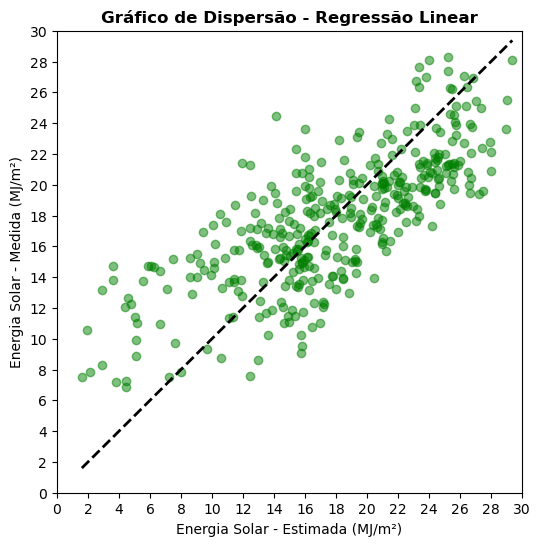

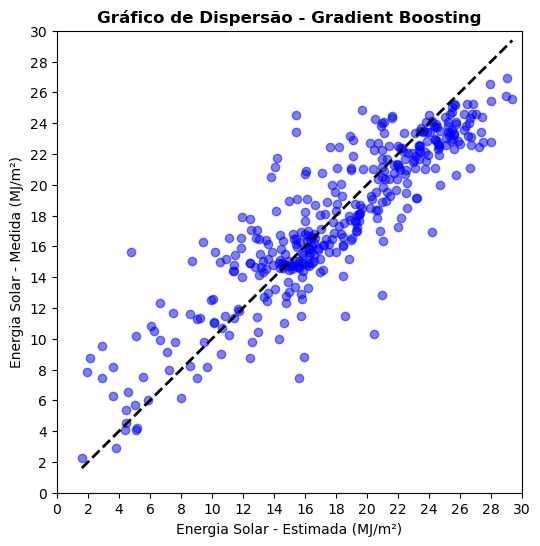

In [6]:
# Gráfico de dispersão para o modelo de Regressão Linear.
pyplot.figure(figsize=(6, 6))
pyplot.scatter(Y_teste, modelo_RL.predict(X_teste), alpha=0.5, color="green")
pyplot.plot(
    [Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], "--k", linewidth=2
)
pyplot.xlabel("Energia Solar - Estimada (MJ/m²)")
pyplot.ylabel("Energia Solar - Medida (MJ/m²)")
pyplot.title("Gráfico de Dispersão - Regressão Linear", weight="bold")

# Define os limites do eixo X e Y.
pyplot.xlim(0, 30)
pyplot.ylim(0, 30)

# Configura os intervalos nos eixos X e Y.
pyplot.gca().xaxis.set_major_locator(MultipleLocator(2))
pyplot.gca().yaxis.set_major_locator(MultipleLocator(2))

# Exibe o gráfico para o modelo de Regressão Linear.
pyplot.show()

# Gráfico de dispersão para o Gradient Boosting.
pyplot.figure(figsize=(6, 6))
pyplot.scatter(Y_teste, modelo_GB.predict(X_teste), alpha=0.5, color="blue")
pyplot.plot(
    [Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], "--k", linewidth=2
)
pyplot.xlabel("Energia Solar - Estimada (MJ/m²)")
pyplot.ylabel("Energia Solar - Medida (MJ/m²)")
pyplot.title("Gráfico de Dispersão - Gradient Boosting", weight="bold")

# Define os limites do eixo X e Y.
pyplot.xlim(0, 30)
pyplot.ylim(0, 30)

# Configura os intervalos nos eixos X e Y.
pyplot.gca().xaxis.set_major_locator(MultipleLocator(2))
pyplot.gca().yaxis.set_major_locator(MultipleLocator(2))

# Exibe o gráfico para o Gradient Boosting.
pyplot.show()

8 - Consumo dos Modelos de Machine Learning

In [7]:
# Inserção manual dos valores para a previsão.
entradas = {
    "Fotoperiodo": 13.28607,
    "TAR": 27.37,
    "UR": 64.45,
    "Extraterrestre": 42.58281,
}

# Cria um data frame com os valores inseridos manualmente.
df_entradas = pandas.DataFrame([entradas])

# Escolhe do modelo para previsão (RL ou GB).
escolha = "GB"

# Faz as previsões usando o modelo escolhido.
if escolha == "GB":
    estimativa = modelo_GB.predict(df_entradas)
    print(f"Energia Solar Estimada com Gradient Boosting: {estimativa[0]:.2f} MJ/m²")

elif escolha == "RL":
    estimativa = modelo_RL.predict(df_entradas)
    print(f"Energia Solar Estimada com Regressão Linear: {estimativa[0]:.2f} MJ/m²")

else:
    print("Modelo escolhido inválido. Por favor, escolha: 'GB' ou 'RL'.")

Energia Solar Estimada com Gradient Boosting: 24.82 MJ/m²
